## Curso - Data Visualization With Python - IBM Cognitive Class

#### Formação: Applied Data Science With Python

#### Victor Hugo Negrisoli - Desenvolvedor de Software Full-Stack & Analista de Dados¶

#### Módulo 1 - Introdução a ferramentas de visualização de dados em Python

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from wordcloud import WordCloud, STOPWORDS

In [3]:
plt.figure(figsize=(15, 5),facecolor = 'red', dpi = 100)

# Criando um gráfico de histograma utilizando a camada de Artista da Matplotlib
# Na camada de artista, define-se o Canvas que será gerado e várias de suas configurações

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)
ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title("Distribuição Normal com $\mu=0, \sigma=1$ - Artist Layer")
fig.savefig("imagens/modulo_1/Teste Histograma - Artist Layer.png")

<Figure size 1500x500 with 0 Axes>

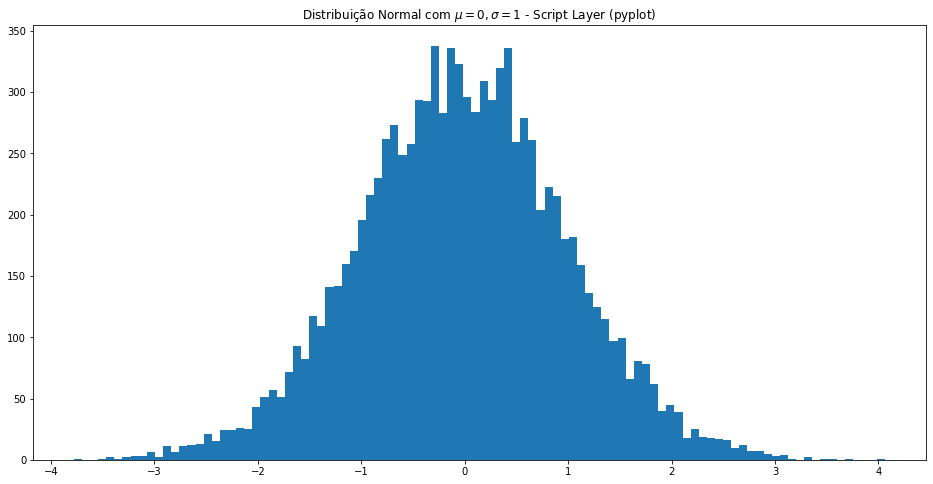

In [4]:
# Criando um gráfico de histograma utilizando a camada de Script da Matplotlib

plt.hist(x, 100)
plt.title("Distribuição Normal com $\mu=0, \sigma=1$ - Script Layer (pyplot)")
plt.savefig("imagens/modulo_1/Teste Histograma - Script Layer.png")
plt.gcf().set_size_inches(16, 8)
plt.show()

In [5]:
# Realizando uma plotagem com o built-in da Matplotlib do Pandas

# Criando um DataFrame de exemplo

df = pd.DataFrame({
    "india": [8880, 8670, 8147, 7338, 5704],
    "china": [5123, 6682, 3308, 1863, 1527]
})

df.head()

,india,china
0,8880,5123
1,8670,6682
2,8147,3308
3,7338,1863
4,5704,1527


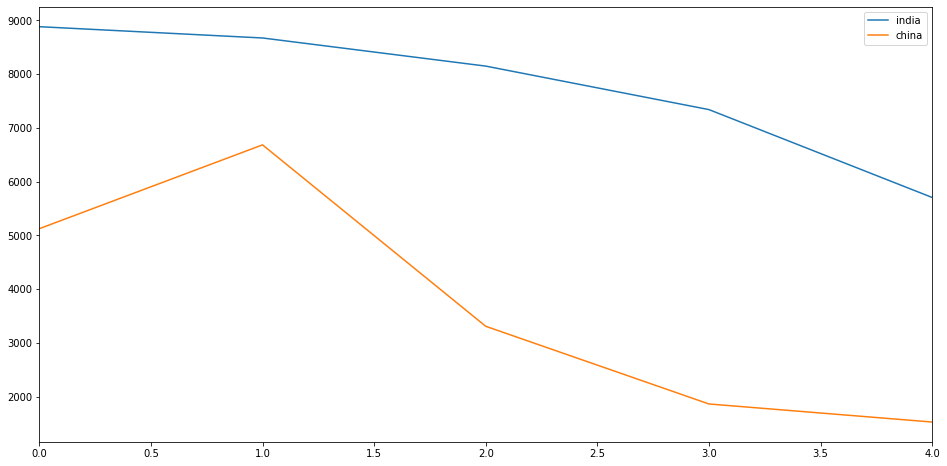

In [6]:
df.plot(kind = "line")
plt.gcf().set_size_inches(16, 8)
plt.show()

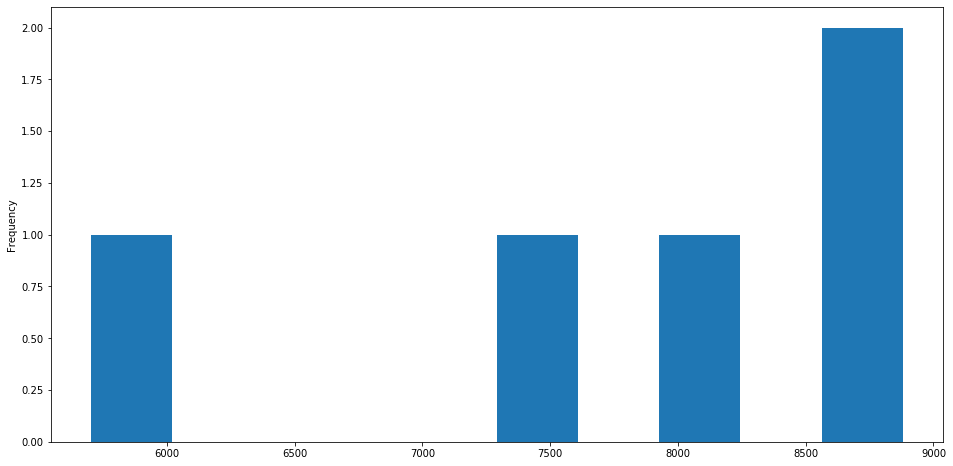

In [7]:
df["india"].plot(kind = "hist")
plt.gcf().set_size_inches(16, 8)
plt.show()

In [8]:
df = pd.read_excel(
    "dados/Canada.xlsx",
    sheet_name = "Canada by Citizenship",
    skiprows = range(20),
    skipfooter = 2
)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# Remove colunas não utilizadas e renomeia outras

df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df.rename(columns = {
    'OdName': 'Country', 
    'AreaName': 'Continent',
    'RegName': 'Region'}, 
    inplace = True)

# Seta a coluna Country como o índice do DataFrame
df["Total"] = df.sum(axis = 1)
df.set_index('Country', inplace = True)

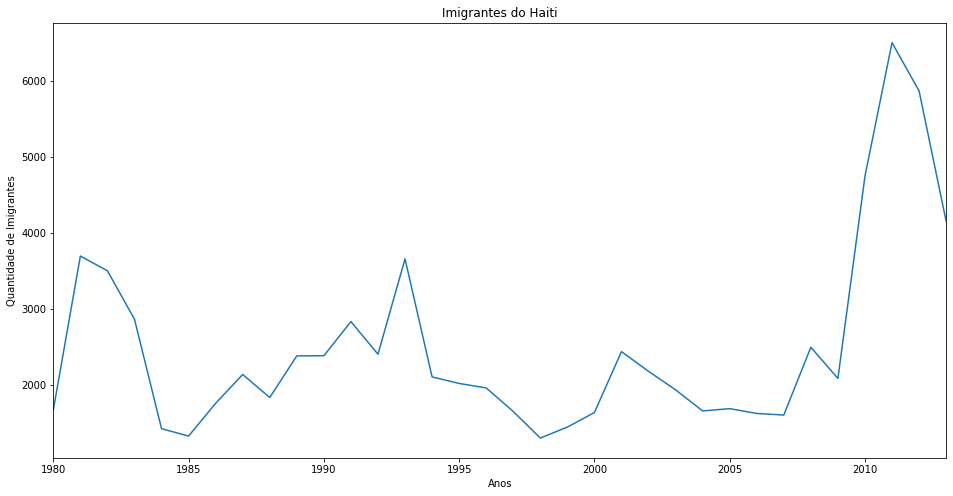

In [10]:
years = list(map(int, range(1980, 2014)))

# Aqui estamos pesquisando pelo índice Haiti, que é um índice do DataFrame, e recuperando todas as colunas de 1980 a 2013
# para plotar um gráfico de linhas

df.loc["Haiti", years].plot(kind = "line")

plt.title("Imigrantes do Haiti")
plt.xlabel("Anos")
plt.ylabel("Quantidade de Imigrantes")
plt.gcf().set_size_inches(16, 8)
plt.show()

In [11]:
# Ordenando o valor pela coluna Total em ordem decrescente

df.sort_values(["Total"], ascending = False, axis = 0, inplace = True)

In [12]:
# Para realizar análise com os anos, precisaremos que as colunas de anos sejam índices
# Para isso, utilizaremos o método transpose para transpor as colunas de anos em uma apenas, representando
# seus valores em linhas 

df_transposto = df[years].head().transpose()
df_transposto = df_transposto.head()

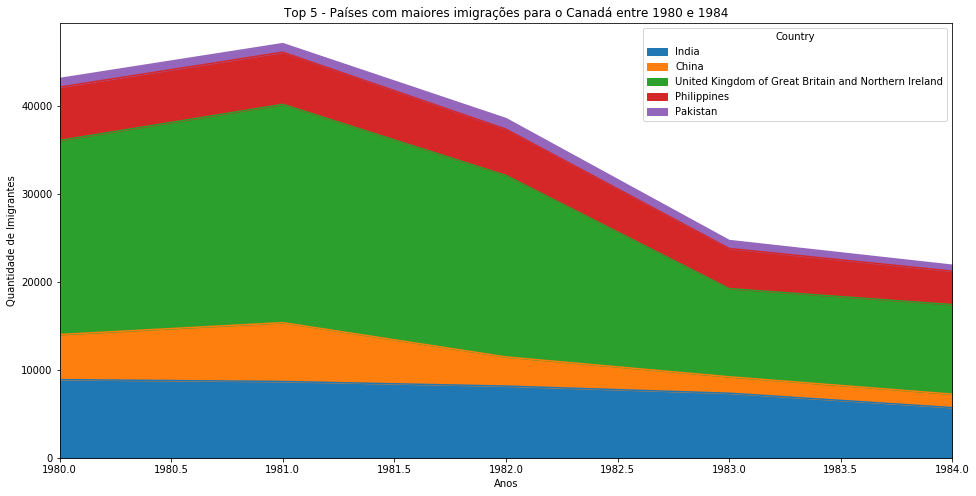

In [13]:
# Agora que temos os 5 anos com os 5 países com mais imigrações, vamos plotar um gráfico de área

df_transposto.plot(kind = "area")

plt.title("Top 5 - Países com maiores imigrações para o Canadá entre 1980 e 1984")
plt.xlabel("Anos")
plt.ylabel("Quantidade de Imigrantes")
plt.gcf().set_size_inches(16, 8)
plt.show()

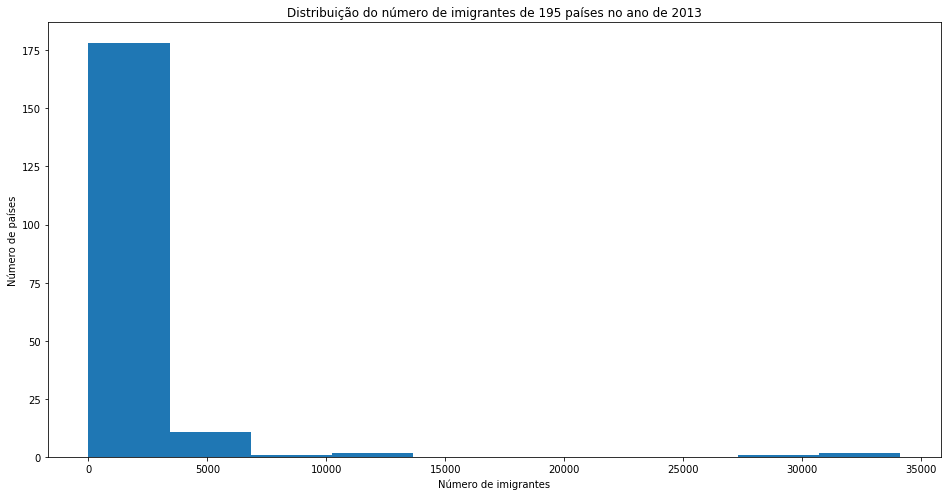

In [14]:
# Criando um gráfico de Histograma dos dados de 2013 relacionados aos imigrantes

df[2013].plot(kind = "hist")

plt.title("Distribuição do número de imigrantes de 195 países no ano de 2013")
plt.xlabel("Número de imigrantes")
plt.ylabel("Número de países")
plt.gcf().set_size_inches(16, 8)
plt.show()

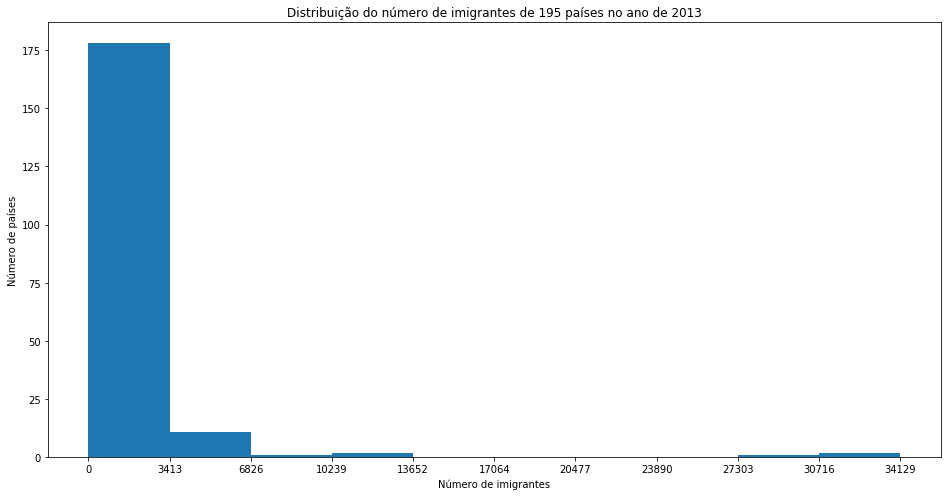

In [15]:
# É possível verificar que o gráfico está difícil de possuir uma legibilidade
# Para tratar este problema e melhorar a legibilidade, iremos utilizar o NumPy

count, bin_edges = np.histogram(df[2013])

df[2013].plot(kind = "hist", xticks = bin_edges)

plt.title("Distribuição do número de imigrantes de 195 países no ano de 2013")
plt.xlabel("Número de imigrantes")
plt.ylabel("Número de países")
plt.gcf().set_size_inches(16, 8)
plt.show()

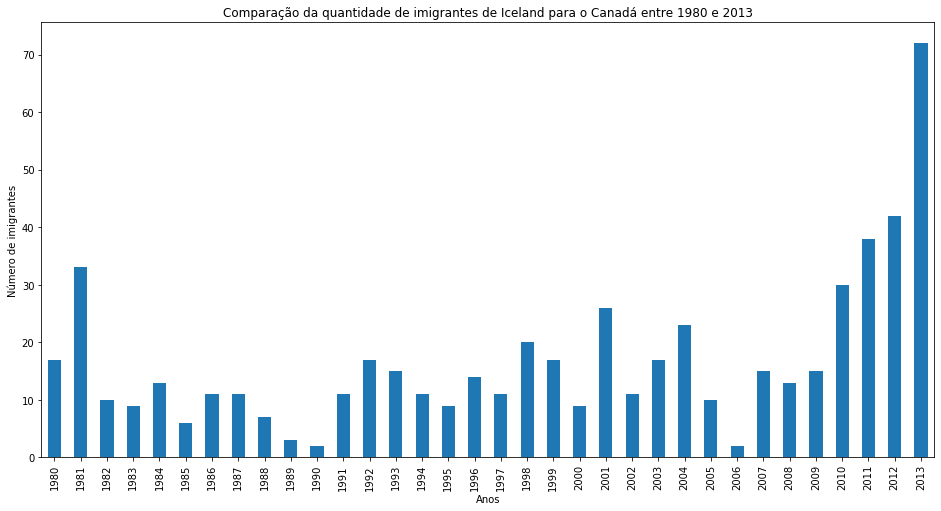

In [16]:
# Criando um gráfico de barras com MatplotLib para verificar a quantidade de imigrantes de 
# Iceland para o Canadá entre 1980 e 2013

count, bin_edges = np.histogram(df[2013])

bar_chart = df.loc["Iceland", years]
bar_chart.plot(kind = "bar")

plt.title("Comparação da quantidade de imigrantes de Iceland para o Canadá entre 1980 e 2013")
plt.xlabel("Anos")
plt.ylabel("Número de imigrantes")
plt.gcf().set_size_inches(16, 8)
plt.show()

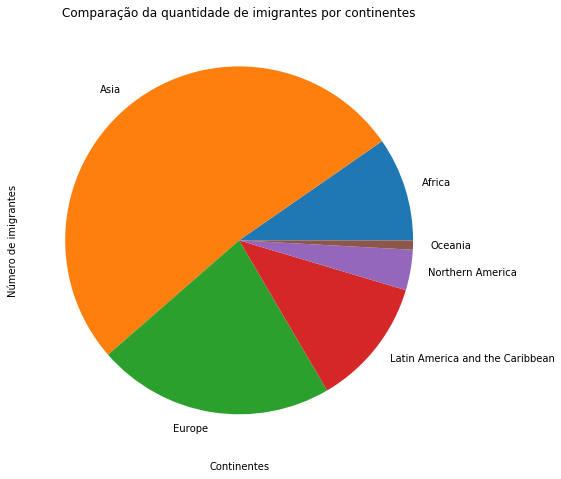

In [17]:
# Criando um gráfico de barras com a biblioteca MatplotLib

bar_data = df.groupby("Continent", axis = 0).sum()
bar_data["Total"].plot(kind = "pie")

plt.title("Comparação da quantidade de imigrantes por continentes")
plt.xlabel("Continentes")
plt.ylabel("Número de imigrantes")
plt.gcf().set_size_inches(16, 8)

plt.show()

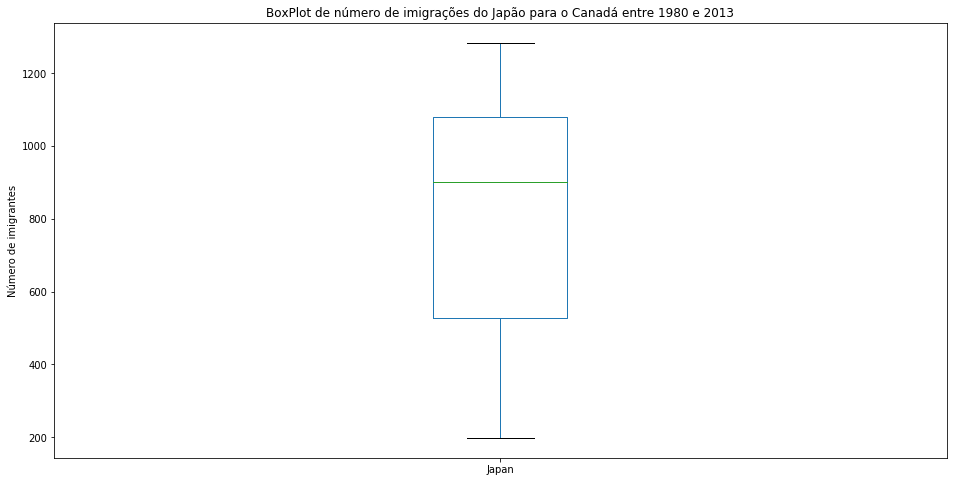

In [18]:
# Criando um gráfico de BoxPlot com a biblioteca MatplotLib

blox_plot_japao = df.loc[["Japan"], years].transpose()
blox_plot_japao.plot(kind = "box")

plt.title("BoxPlot de número de imigrações do Japão para o Canadá entre 1980 e 2013")
plt.ylabel("Número de imigrantes")
plt.gcf().set_size_inches(16, 8)

plt.show()

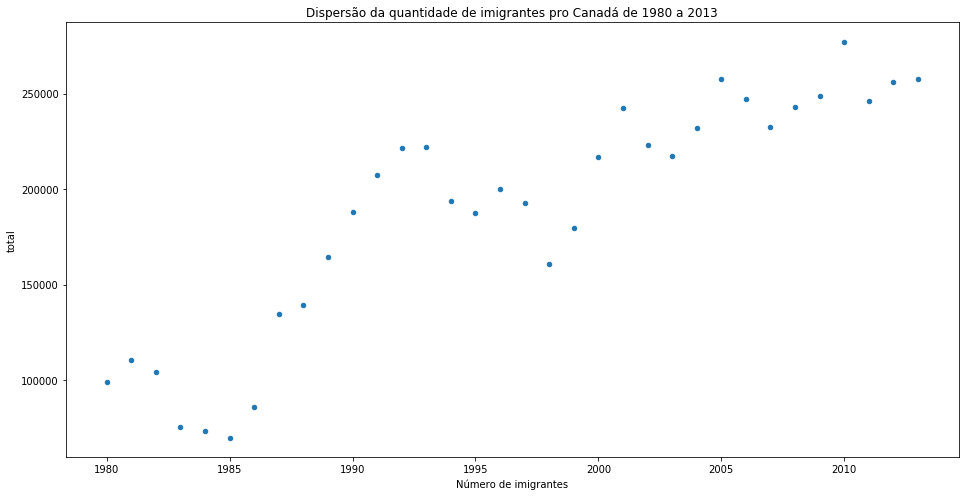

In [19]:
# Criando um gráfico de Dispersão com a biblioteca MatplotLib
# Primeiramente, será necessário remodelar o DataFrame, fazendo com que tenhamos apenas a coluna dos anos e seus totais

df_scatter = pd.DataFrame(df[years].sum(axis = 0))
df_scatter.index = map(int, df_scatter.index)
df_scatter.reset_index(inplace = True)
df_scatter.columns = ['year', 'total']

df_scatter.plot(kind = "scatter", x = "year", y = "total")

plt.title("Dispersão da quantidade de imigrantes pro Canadá de 1980 a 2013")
plt.xlabel("Anos")
plt.xlabel("Número de imigrantes")
plt.gcf().set_size_inches(16, 8)

plt.show()

#### Módulo 04 - Regressão com Seaborn e gráfico do tipo Word Cloud

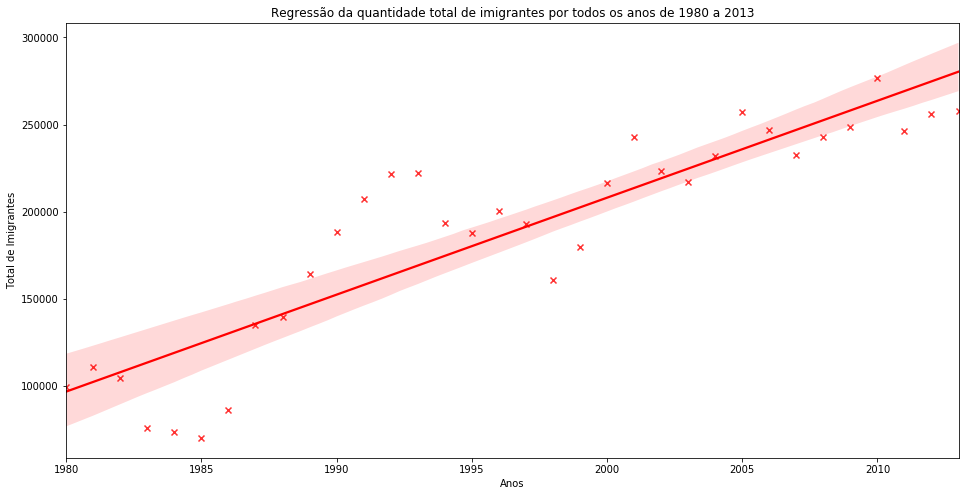

In [42]:
# Criando um gráfico de regressão comparando o total de imigrantes de cada um dos anos utilizando a biblioteca Seaborn

df_regression = df_scatter

sns.regplot(x = "year", y = "total", data = df_regression, color = "red", marker = "x")
plt.title("Regressão da quantidade total de imigrantes por todos os anos de 1980 a 2013")
plt.xlabel("Anos")
plt.ylabel("Total de Imigrantes")
plt.gcf().set_size_inches(16, 8)

plt.show()

In [59]:
# Criando um gráfico de Word Clouds a partir do arquivo alice_novel.txt

# Primeiramente, faremos a leitura do arquivo

file = 'dados/alice_novel.txt'

alice_novel = open(file, 'r').read()

In [53]:
# Agora, iremos instanciar um objeto do tipo Word Cloud para o texto e gerar com a função generate informando 
# o arquivo texto em formato .txt que foi lido anteriormente

stopwords = set(STOPWORDS)
alice_wc = WordCloud(background_color = "white", max_words = 2000, stopwords = stopwords)
alice_wc.generate(alice_novel)

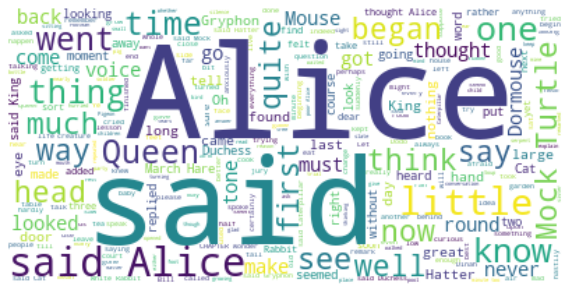

In [55]:
# Iremos utilizar a MatplotLib para gerar a imagem que foi gerada pelo Word Cloud

plt.imshow(alice_wc, interpolation = "bilinear")
plt.axis("off")
plt.gcf().set_size_inches(10, 8)
plt.show()

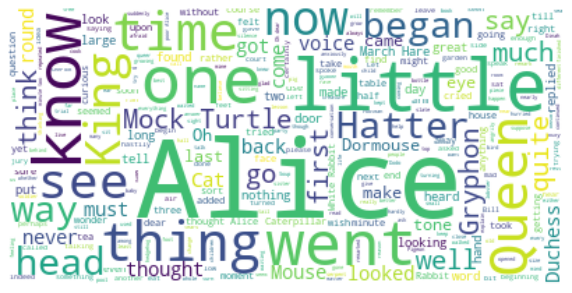

In [58]:
# Vamos remover a palavra "said" inserindo ela no objeto stopwords para que possamos ver as outras com menores frequência

stopwords.add('said')
alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation = "bilinear")
plt.axis("off")
plt.gcf().set_size_inches(10, 8)
plt.show()